In [118]:
import pandas as pd
import numpy as np

In [119]:
data_wig20 = pd.read_csv("data/wig20_2005.csv")
data_kghm = pd.read_csv("data/kgh_2005.csv")

In [120]:
data_kghm['Zwrot'] = data_kghm['Zamkniecie'].pct_change()
data_wig20['Zwrot'] = data_wig20['Zamkniecie'].pct_change()

In [121]:
window_length = 30

In [122]:
rolling_betas = [np.nan] * window_length 

In [123]:
for end_index in range(window_length, len(data_kghm)):
    window_data_kghm = data_kghm.iloc[end_index-window_length:end_index]
    window_data_wig20 = data_wig20.iloc[end_index-window_length:end_index]

    avg_return_market = window_data_wig20['Zwrot'].mean()
    avg_return_asset = window_data_kghm['Zwrot'].mean()

    sum_numerator = ((window_data_kghm['Zwrot'] - avg_return_asset) * (window_data_wig20['Zwrot'] - avg_return_market)).sum()
    sum_denominator = ((window_data_wig20['Zwrot'] - avg_return_market) ** 2).sum()

    beta = sum_numerator / sum_denominator if sum_denominator != 0 else np.nan
    rolling_betas.append(beta)

In [124]:
rolling_betas = rolling_betas[:len(data_kghm)]

In [125]:
data_kghm['Rolling Beta'] = rolling_betas

In [126]:
data_kghm.head(100)

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen,Zwrot,Rolling Beta
0,2005-01-03,10.27210,10.43490,10.20380,10.27210,1.351049e+06,NaN,NaN
1,2005-01-04,10.23550,10.27210,10.07270,10.10750,2.908545e+06,-0.016024,NaN
2,2005-01-05,9.71454,9.71454,9.48536,9.58551,6.020221e+06,-0.051644,NaN
3,2005-01-06,9.48536,9.48536,9.15794,9.32069,3.856970e+06,-0.027627,NaN
4,2005-01-07,9.32069,9.58551,9.12607,9.45358,2.093734e+06,0.014258,NaN
...,...,...,...,...,...,...,...,...
95,2005-05-20,9.45358,9.61633,9.32069,9.35632,1.679409e+06,-0.013604,1.083857
96,2005-05-23,9.38714,9.48536,9.32069,9.35632,7.082438e+05,0.000000,0.937319
97,2005-05-24,9.35632,9.38714,9.19165,9.35632,7.838466e+05,0.000000,1.045158
98,2005-05-25,9.35632,9.48536,9.35632,9.45358,8.302930e+05,0.010395,1.001854


In [127]:
data_kghm.to_csv("data/kgh_2005_beta.csv", index=False)

In [128]:
start_date = data_kghm.index[30]

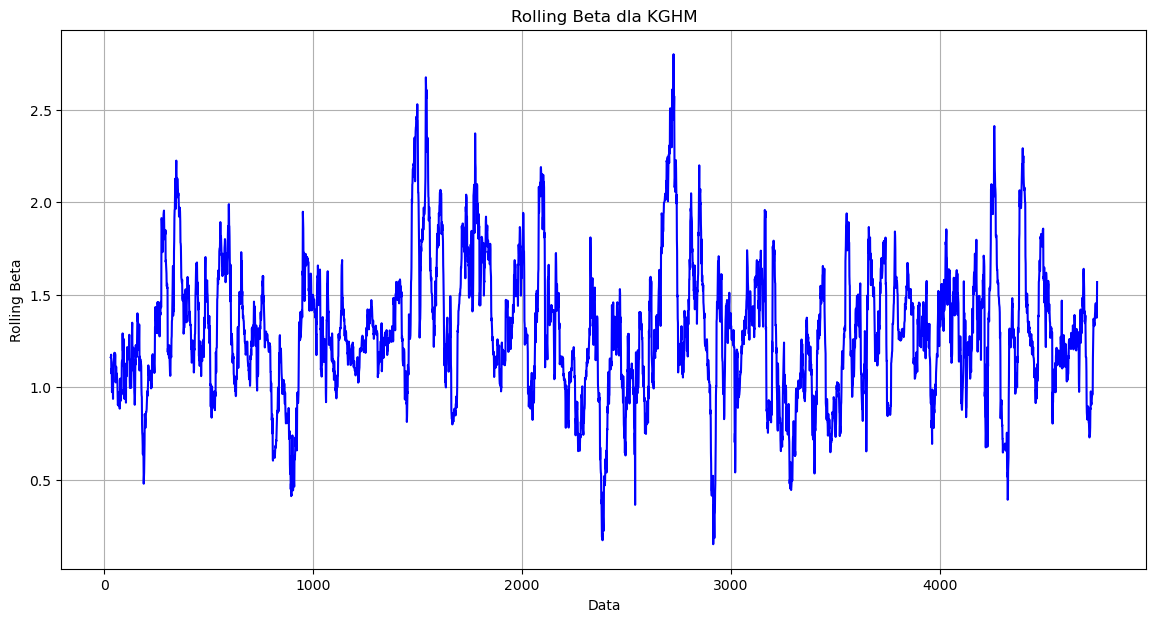

In [129]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(data_kghm.loc[start_date:].index, data_kghm.loc[start_date:]['Rolling Beta'], color='blue')
plt.title('Rolling Beta dla KGHM')
plt.xlabel('Data')
plt.ylabel('Rolling Beta')
plt.grid(True)
plt.show()

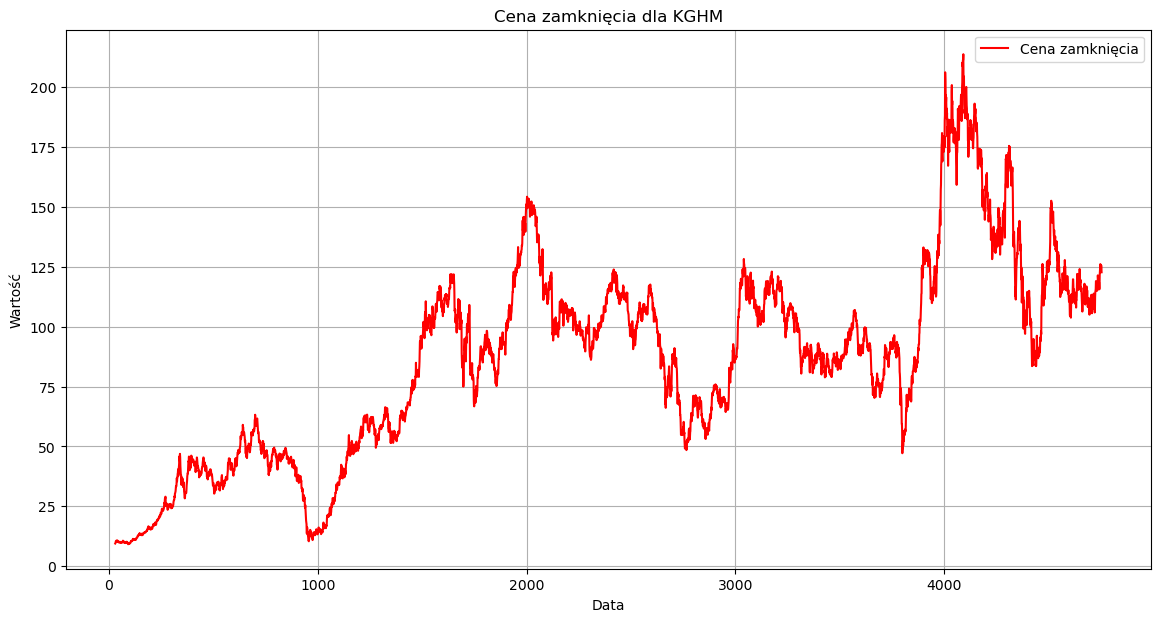

In [130]:
start_date = data_kghm.index[30]

plt.figure(figsize=(14, 7))
plt.plot(data_kghm.loc[start_date:].index, data_kghm.loc[start_date:]['Zamkniecie'], color='red', label='Cena zamknięcia')
plt.title('Cena zamknięcia dla KGHM')
plt.xlabel('Data')
plt.ylabel('Wartość')
plt.grid(True)
plt.legend()
plt.show()

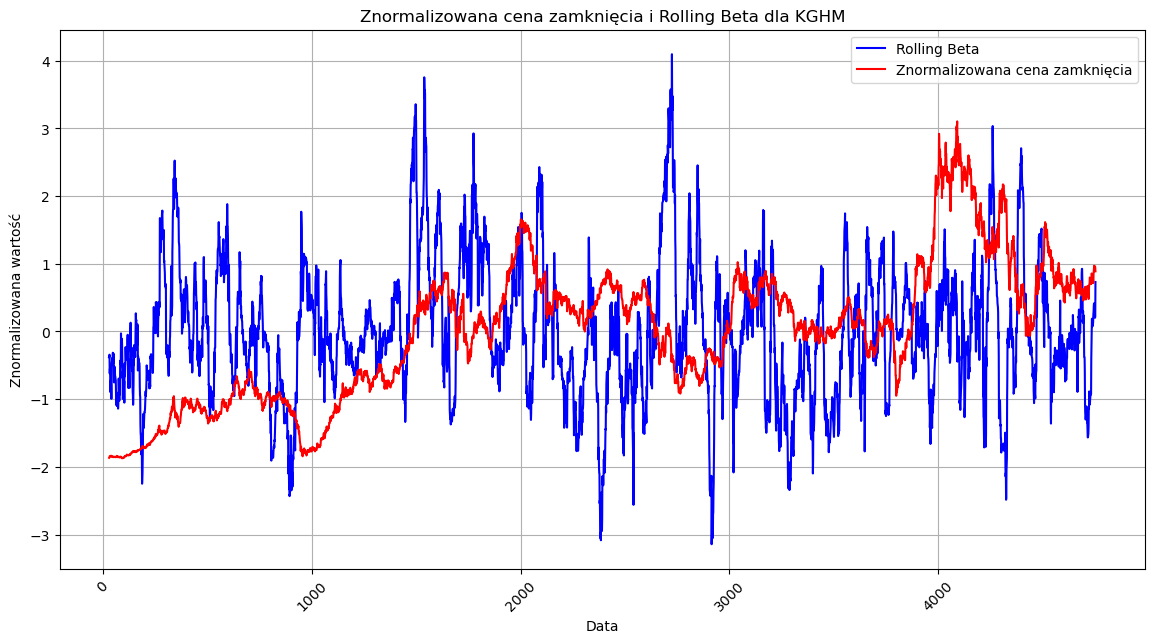

In [131]:
start_date = data_kghm.index[30]

normalized_rolling_beta = (data_kghm.loc[start_date:]['Rolling Beta'] - data_kghm.loc[start_date:]['Rolling Beta'].mean()) / data_kghm.loc[start_date:]['Rolling Beta'].std()
normalized_closing_price = (data_kghm.loc[start_date:]['Zamkniecie'] - data_kghm.loc[start_date:]['Zamkniecie'].mean()) / data_kghm.loc[start_date:]['Zamkniecie'].std()

plt.figure(figsize=(14, 7))
plt.plot(data_kghm.loc[start_date:].index, normalized_rolling_beta, color='blue', label='Rolling Beta')
plt.plot(data_kghm.loc[start_date:].index, normalized_closing_price, color='red', label='Znormalizowana cena zamknięcia')
plt.title('Znormalizowana cena zamknięcia i Rolling Beta dla KGHM')
plt.xlabel('Data')
plt.ylabel('Znormalizowana wartość')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()